In [275]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline
''' %matplotlib inline is a magic command in Python
used specifically in Jupyter notebooks. When you execute this 
command in a Jupyter notebook cell, it allows the notebook to display matplotlib 
plots directly within the notebook interface, rather than opening them in separate windows or
saving them to files. '''

' %matplotlib inline is a magic command in Python\nused specifically in Jupyter notebooks. When you execute this \ncommand in a Jupyter notebook cell, it allows the notebook to display matplotlib \nplots directly within the notebook interface, rather than opening them in separate windows or\nsaving them to files. '

In [276]:
df = pd.read_csv("customer_churn.csv")
df.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
5943,2202-CUYXZ,Male,0,No,No,1,Yes,No,Fiber optic,No,...,Yes,No,Yes,No,Month-to-month,Yes,Electronic check,84.85,84.85,Yes
3009,8896-BQTTI,Male,0,No,No,1,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,25.00,25,No
6099,7711-GQBZC,Female,0,Yes,Yes,71,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic),24.70,1810.55,No
5995,2193-SFWQW,Male,0,Yes,Yes,72,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,No,Bank transfer (automatic),111.95,8033.1,No
1738,8646-JCOMS,Female,0,Yes,No,66,Yes,Yes,Fiber optic,No,...,Yes,Yes,No,No,One year,Yes,Bank transfer (automatic),90.55,6130.95,No


customer id is useless while working with machine learning model, lets drop it

In [277]:
df.drop('customerID', axis='columns', inplace=True)
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

The monthly charges are strings while the total charges are numbers 

In [278]:
df.TotalCharges.values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [279]:
df.MonthlyCharges.values

array([ 29.85,  56.95,  53.85, ...,  29.6 ,  74.4 , 105.65])

Lets convert the strings to numbers, if we try to convert directly it wont work due some values being blank and only having space

In [280]:
df[pd.to_numeric(df.TotalCharges, errors='coerce').isnull()] #convert the values with errors to blank, then seperate the rows that are null

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


Lets delete these 11 rows with the space instead of number in the values in total charges

In [281]:
df.shape

(7043, 20)

In [282]:
df1= df[df.TotalCharges!=' ']
df1.shape

(7032, 20)

In [283]:
df1.TotalCharges = pd.to_numeric(df1.TotalCharges)

/tmp/ipykernel_15498/973151263.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.TotalCharges = pd.to_numeric(df1.TotalCharges)


In [284]:
df1.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

* Customer churn = customer leaving
* Now lets check the relation of customer churn wrt tenure using histogram

In [285]:
df1.Churn=='No'

0        True
1        True
2       False
3        True
4       False
        ...  
7038     True
7039     True
7040     True
7041    False
7042     True
Name: Churn, Length: 7032, dtype: bool

In [286]:
df1[df1.Churn=='No']

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
6,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No
7,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7037,Female,0,No,No,72,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),21.15,1419.40,No
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No


In [287]:
tenure_churn_no =  df1[df1.Churn=='No'].tenure
tenure_churn_no

0        1
1       34
3       45
6       22
7       10
        ..
7037    72
7038    24
7039    72
7040    11
7042    66
Name: tenure, Length: 5163, dtype: int64

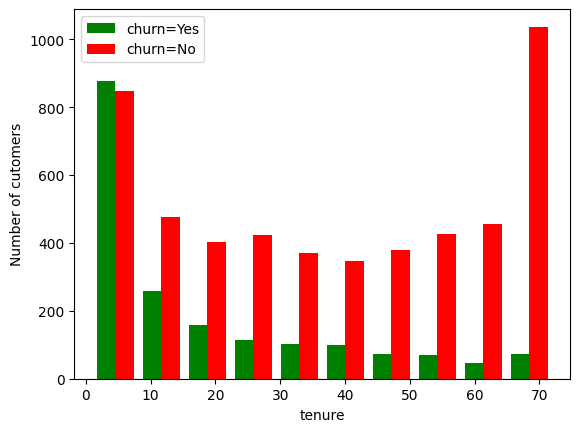

In [288]:
tenure_churn_no =  df1[df1.Churn=='No'].tenure
tenure_churn_yes = df1[df1.Churn=='Yes'].tenure

plt.xlabel('tenure')
plt.ylabel('Number of cutomers')
plt.hist([tenure_churn_yes, tenure_churn_no], color=['green','red'], label=['churn=Yes','churn=No'])
plt.legend()




As expected more tenure less churn

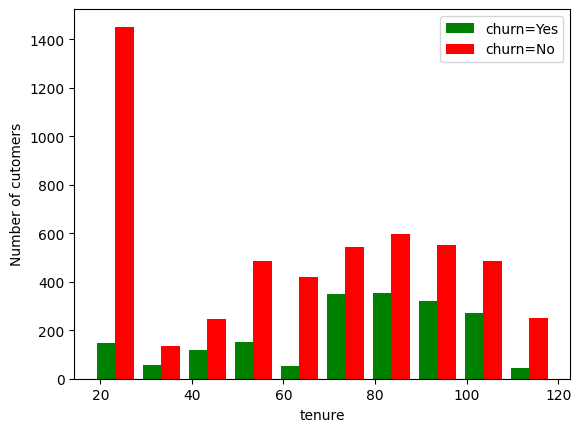

In [289]:
mc_churn_no =  df1[df1.Churn=='No'].MonthlyCharges
mc_churn_yes = df1[df1.Churn=='Yes'].MonthlyCharges

plt.xlabel('tenure')
plt.ylabel('Number of cutomers')
plt.hist([mc_churn_yes, mc_churn_no], color=['green','red'], label=['churn=Yes','churn=No'])
plt.legend()


lets check what unique values each column has

In [290]:
for column in df:
    print(f'{column}: {df[column].unique()}')

gender: ['Female' 'Male']
SeniorCitizen: [0 1]
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalChar

lets print only the categorical columns

In [291]:
def print_unique_col_values(df):
    for column in df:
        if df[column].dtypes=='object':
         print(f'{column}: {df[column].unique()}')

In [292]:
print_unique_col_values(df1)

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


In [293]:
df1.replace('No internet service', 'No', inplace=True) 
df1.replace('No phone service', 'No', inplace=True) 
#inplace modifies the data frame otherwise we need to do df1 = df1.something

print_unique_col_values(df1)

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes']
OnlineBackup: ['Yes' 'No']
DeviceProtection: ['No' 'Yes']
TechSupport: ['No' 'Yes']
StreamingTV: ['No' 'Yes']
StreamingMovies: ['No' 'Yes']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


/tmp/ipykernel_15498/2276395935.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace('No internet service', 'No', inplace=True)
/tmp/ipykernel_15498/2276395935.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace('No phone service', 'No', inplace=True)


lets convert yes and no to 1 and  0

In [294]:
for column in df1:
    if df1[column].dtypes=='object':
        if set(df1[column].unique()) == {'Yes', 'No'}:
                df1[column].replace({'Yes': 1 ,'No':0}, inplace=True) 

df1.sample(6)

/tmp/ipykernel_15498/1276201708.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[column].replace({'Yes': 1 ,'No':0}, inplace=True)


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
6242,Female,0,1,1,72,1,1,Fiber optic,1,1,1,1,0,1,Two year,0,Credit card (automatic),107.45,7658.30,0
4488,Female,1,1,0,42,1,0,Fiber optic,1,0,0,0,0,0,Month-to-month,1,Credit card (automatic),74.15,3229.40,1
4982,Female,1,1,0,61,1,1,Fiber optic,0,1,1,0,1,1,One year,1,Credit card (automatic),104.40,6405.00,1
4570,Male,0,0,0,7,1,0,No,0,0,0,0,0,0,Month-to-month,1,Mailed check,18.95,130.55,0
4594,Female,0,1,1,21,1,0,Fiber optic,0,1,1,1,1,1,Month-to-month,1,Electronic check,102.80,2110.15,1
119,Male,0,1,1,27,1,1,Fiber optic,0,1,0,1,0,0,Month-to-month,1,Credit card (automatic),85.20,2151.60,0


In [295]:
for column in df1:
    print(f'{column}: {df1[column].unique()}')

gender: ['Female' 'Male']
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService: [0 1]
MultipleLines: [0 1]
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [0 1]
StreamingTV: [0 1]
StreamingMovies: [0 1]
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: [1 0]
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges: [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn: [0 1]


In [296]:
df1['gender'].replace({'Female': 1 ,'Male':0}, inplace=True) 

/tmp/ipykernel_15498/3688906292.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['gender'].replace({'Female': 1 ,'Male':0}, inplace=True)


Lets do onw hot encodeing for three columns, which will create multiple new columns

In [297]:
df2 = pd.get_dummies(data=df1, columns=['InternetService', 'Contract', 'PaymentMethod'])

df2.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [298]:
df2.sample(4)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
347,1,0,1,0,70,1,0,0,0,0,...,False,False,True,False,False,True,True,False,False,False
1505,0,1,0,0,1,1,1,0,0,0,...,False,True,False,True,False,False,False,False,True,False
3942,0,0,0,0,1,1,0,0,0,0,...,True,False,False,True,False,False,False,False,True,False
1983,0,0,1,0,27,1,1,1,0,0,...,True,False,False,False,True,False,False,False,False,True


In [299]:
df2.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_DSL                           bool
InternetService_Fiber optic                   bool
InternetService_No             

In [300]:
df2.replace({True: 1 ,False:0}, inplace=True) 
df2.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_DSL                          int64
InternetService_Fiber optic                  int64
InternetService_No             

In [301]:
df2.sample(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
2108,1,0,0,0,46,1,0,0,0,0,...,1,0,0,1,0,0,1,0,0,0
6829,0,0,1,1,8,1,0,0,0,0,...,0,0,1,0,0,1,0,1,0,0
4290,1,0,1,1,1,0,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0
3208,0,0,1,0,48,1,1,0,1,1,...,1,0,0,0,1,0,0,1,0,0
6338,0,0,0,0,1,1,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1


* converted all columns to int or float
* scale all of them within 0 and 1

In [302]:
cols_to_scale = ['tenure', 'MonthlyCharges', 'TotalCharges']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df2[cols_to_scale] = scaler.fit_transform(df2[cols_to_scale])

In [303]:
df2.sample(6)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
1832,0,1,1,0,0.788732,0,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0
3922,0,1,1,0,0.929577,1,1,0,0,0,...,0,1,0,1,0,0,0,1,0,0
3498,0,0,0,0,0.591549,1,0,1,0,0,...,0,1,0,1,0,0,0,0,1,0
4468,1,0,0,0,0.197183,1,1,0,0,0,...,0,0,1,1,0,0,0,1,0,0
5777,0,0,1,0,1.000000,1,1,1,1,1,...,1,0,0,0,0,1,0,0,0,1
5766,1,0,1,0,0.309859,1,0,0,0,0,...,1,0,0,0,1,0,1,0,0,0


# Train Test Split

In [304]:
X = df2.drop('Churn', axis='columns')
y = df2['Churn']

In [305]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=5)

Setting a specific random_state value ensures that the random shuffling is deterministic and reproducible. This means that if you use the same random_state value again in the future, you will get the same random split of the data. This can be useful for debugging, testing, and ensuring that your results are consistent across different runs.

In [306]:
len(X_train.columns)

26

In [307]:
import tensorflow as tf
from tensorflow import keras

#same no. of neurons in input as columns given by input shape
#output layer with activation as sigmoid and one neuron as output is either 0 or 1
model = keras.Sequential([
    keras.layers.Dense(20, input_shape=(26,), activation='relu'), 
    # keras.layers.Dense(20, activation='relu'), 
    keras.layers.Dense(1, activation='sigmoid'), 
])

model.compile(optimizer='adam',
              loss = 'binary_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=40)

Epoch 1/40
176/176 [==============================] - 1s 1ms/step - loss: 0.4872 - accuracy: 0.7625
Epoch 2/40
176/176 [==============================] - 0s 961us/step - loss: 0.4282 - accuracy: 0.7982
Epoch 3/40
176/176 [==============================] - 0s 1ms/step - loss: 0.4206 - accuracy: 0.7996
Epoch 4/40
176/176 [==============================] - 0s 973us/step - loss: 0.4168 - accuracy: 0.8050
Epoch 5/40
176/176 [==============================] - 0s 1ms/step - loss: 0.4150 - accuracy: 0.8069
Epoch 6/40
176/176 [==============================] - 0s 1ms/step - loss: 0.4137 - accuracy: 0.8046
Epoch 7/40
176/176 [==============================] - 0s 1ms/step - loss: 0.4127 - accuracy: 0.8075
Epoch 8/40
176/176 [==============================] - 0s 997us/step - loss: 0.4114 - accuracy: 0.8084
Epoch 9/40
176/176 [==============================] - 0s 1ms/step - loss: 0.4103 - accuracy: 0.8087
Epoch 10/40
176/176 [==============================] - 0s 1ms/step - loss: 0.4102 - accuracy: 

In [308]:
model.evaluate(X_test, y_test)

44/44 [==============================] - 0s 897us/step - loss: 0.4414 - accuracy: 0.7925


[0.44139280915260315, 0.7924662232398987]

In [309]:
yp=model.predict(X_test)
yp[:5]

44/44 [==============================] - 0s 794us/step


array([[0.22030099],
       [0.38539353],
       [0.01557366],
       [0.7979653 ],
       [0.50012606]], dtype=float32)

In [310]:
y_test[:10] #less than 0.5=0, more than 0.5=1

2660    0
744     0
5579    1
64      1
3287    1
816     1
2670    0
5920    0
1023    0
6087    0
Name: Churn, dtype: int64

In [311]:
y_pred =[]
for element in yp:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [312]:
y_pred[:10]

[0, 0, 0, 1, 1, 1, 0, 1, 0, 0]

In [313]:
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.89      0.86       999
           1       0.67      0.55      0.61       408

    accuracy                           0.79      1407
   macro avg       0.75      0.72      0.73      1407
weighted avg       0.78      0.79      0.79      1407



Text(95.72222222222221, 0.5, 'Truth')

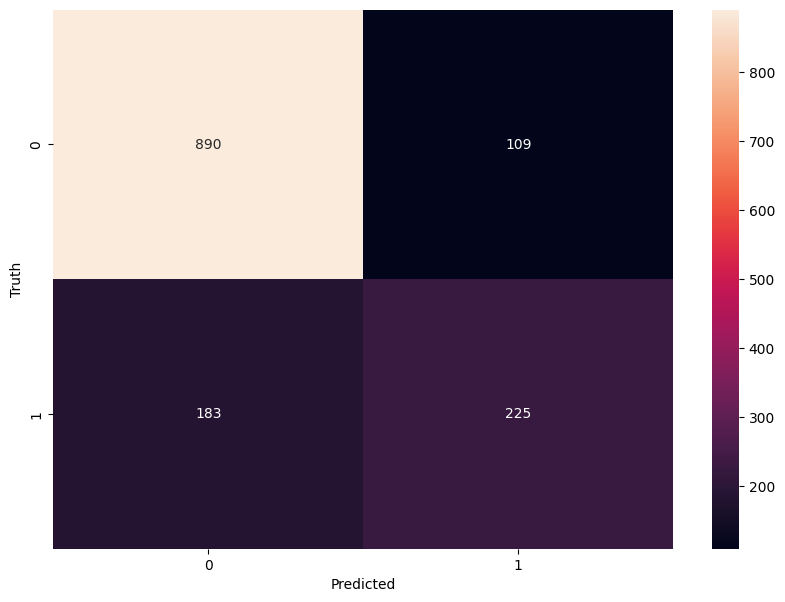

In [314]:
import seaborn as sn

cm = tf.math.confusion_matrix(labels=y_test, predictions=y_pred)

plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [315]:
accuracy = (892+220)/(892+107+188+220) #matches exactly with what we predicted earlier
accuracy

0.7903340440653873

precision 0 class TP/TP+FP

In [316]:
892/(892+188)

0.825925925925926

precision 1 class TP/TP+FP

In [317]:
220/(107+220)

0.672782874617737

recall 0 class TP/TP+FN

In [318]:
892/(107+892)

0.8928928928928929

recall 1 class TP/TP+FN

In [319]:
188/(188+220)

0.46078431372549017